# Cleaning Data
**Level 1 --> Project 3** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
# Check uniqueness of 'id' and 'host_id'
print(f"Duplicate IDs: {df['id'].duplicated().sum()}")
print(f"Duplicate Host IDs: {df['host_id'].duplicated().sum()}")



Duplicate IDs: 0
Duplicate Host IDs: 11438


In [8]:
# Drop duplicate 'id' entries
df = df.drop_duplicates(subset='id', keep='first')

In [9]:
# Check for missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Handle missing data
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['name'] = df['name'].fillna("Unknown")  # Replace missing names
df['host_name'] = df['host_name'].fillna("Unknown Host")  # Replace missing host names
# Impute missing 'last_review' with the mean or median date per neighborhood
df['last_review'] = df.groupby('neighbourhood')['last_review'].transform(lambda x: x.fillna(x.median()))
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)  # Fill missing reviews with 0


c:\Users\Muhammad Faiq\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Muhammad Faiq\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\Muhammad Faiq\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [11]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       3
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [12]:
df = df.dropna(subset=['last_review'])

In [13]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
df['last_review'] = df['last_review'].dt.strftime('%Y-%m-%d')

In [14]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['calculated_host_listings_count'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')


In [15]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [16]:
invalid_geo = df[(df['latitude'] < -90) | (df['latitude'] > 90) | (df['longitude'] < -180) | (df['longitude'] > 180)]
print("Invalid Geographic Data:\n", invalid_geo)

Invalid Geographic Data:
 Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []


In [17]:
# Standardize categorical values
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title()
df['room_type'] = df['room_type'].str.strip().str.title()

# Check unique values
print("Unique Neighbourhood Groups:\n", df['neighbourhood_group'].unique())
print("Unique Room Types:\n", df['room_type'].unique())

Unique Neighbourhood Groups:
 ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique Room Types:
 ['Private Room' 'Entire Home/Apt' 'Shared Room']


### Outlier Detection

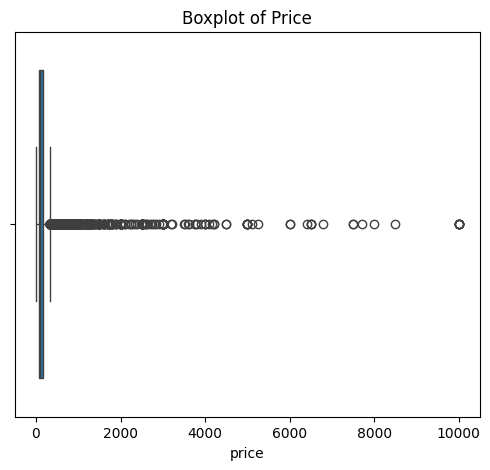

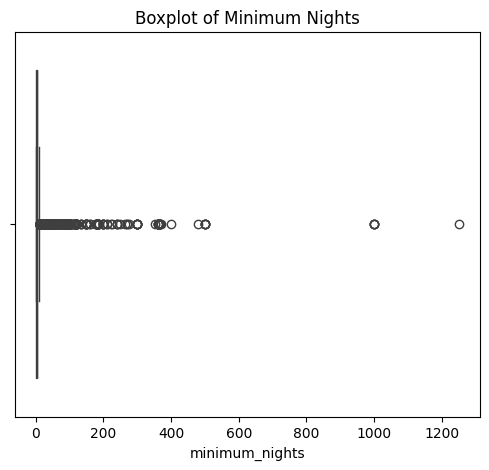

In [18]:
# Visualize 'price'
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.show()

# Visualize 'minimum_nights'
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights')
plt.show()

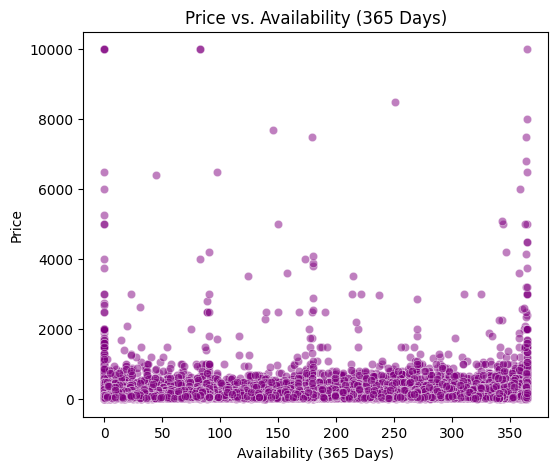

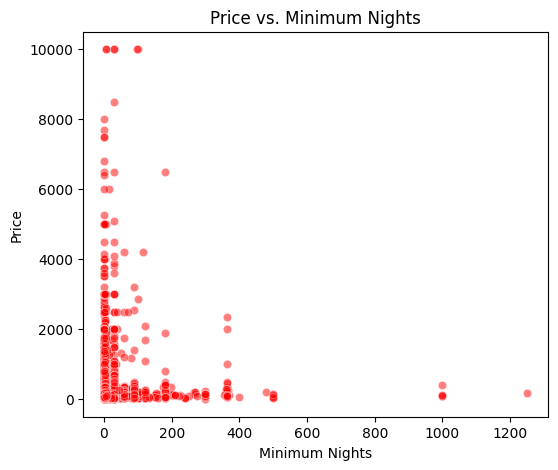

In [19]:
# Scatter plot to explore 'price' vs 'availability_365'
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='availability_365', y='price', alpha=0.5, color='purple')
plt.title('Price vs. Availability (365 Days)')
plt.xlabel('Availability (365 Days)')
plt.ylabel('Price')
plt.show()

# Scatter plot for 'minimum_nights' vs 'price'
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='minimum_nights', y='price', alpha=0.5, color='red')
plt.title('Price vs. Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.show()


In [20]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column} - Outliers Detected: {len(outliers)}")
    return outliers, lower_bound, upper_bound

# Check for outliers in 'price' and 'minimum_nights'
price_outliers, price_lower, price_upper = detect_outliers_iqr(df, 'price')
min_nights_outliers, min_nights_lower, min_nights_upper = detect_outliers_iqr(df, 'minimum_nights')


price - Outliers Detected: 2970
minimum_nights - Outliers Detected: 6607


In [21]:
# Cap/Floor outliers in 'price'
df['price'] = df['price'].clip(lower=price_lower, upper=price_upper)

# Cap/Floor outliers in 'minimum_nights'
df['minimum_nights'] = df['minimum_nights'].clip(lower=min_nights_lower, upper=min_nights_upper)


In [22]:
# Drop rows with extreme outliers
df = df[(df['price'] >= price_lower) & (df['price'] <= price_upper)]
df = df[(df['minimum_nights'] >= min_nights_lower) & (df['minimum_nights'] <= min_nights_upper)]


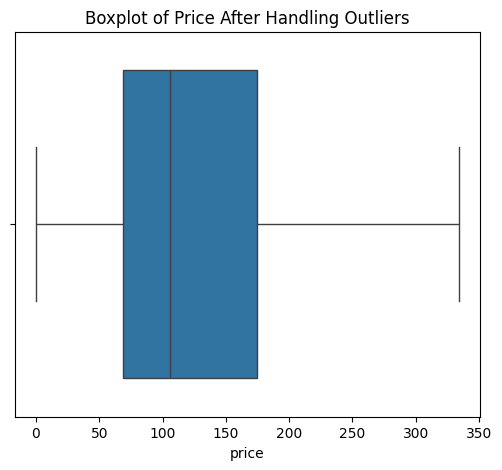

In [23]:
# Visualize 'price' again to verify
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price After Handling Outliers')
plt.show()


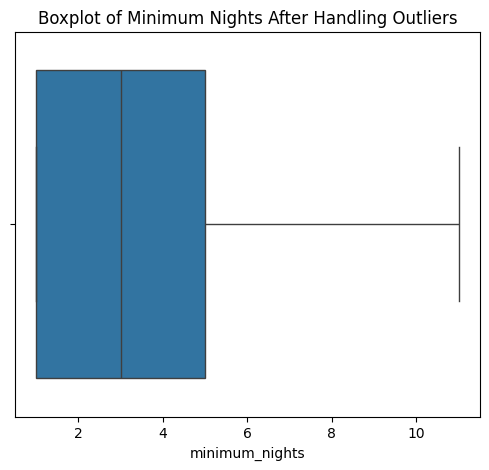

In [24]:
# Visualize 'minimum_nights' after handling outliers with a boxplot
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['minimum_nights'])
plt.title('Boxplot of Minimum Nights After Handling Outliers')
plt.show()

### Conclusion
In this data cleaning project, we successfully addressed key issues in the dataset, including missing values, duplicates, standardization, and outliers. Missing values were handled through imputation or removal, ensuring completeness. Duplicates were identified and removed to maintain data integrity. We standardized categorical and numerical values for consistency, and outliers were detected and managed using statistical methods to prevent them from skewing the analysis. As a result, the dataset is now clean, consistent, and ready for further analysis or modeling, providing a solid foundation for making accurate, data-driven decisions.